# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv('Dataset/Dataset_Clustering.csv')

In [4]:
df

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log,Cluster
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten,22.654787,1
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten,22.227343,1
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten,22.096981,1
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten,21.917188,2
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten,21.976029,2
...,...,...,...,...,...,...,...,...,...,...,...,...
23540,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten,21.917188,2
23541,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten,22.109560,1
23542,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten,21.511723,2
23543,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten,21.391095,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23545 entries, 0 to 23544
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link_penjualan     23545 non-null  object 
 1   lokasi_rumah       23545 non-null  object 
 2   harga              23545 non-null  float64
 3   jumlah_kamar       23545 non-null  float64
 4   jumlah_kamarmandi  23545 non-null  float64
 5   luas_tanah         23545 non-null  int64  
 6   harga_permeter     23545 non-null  object 
 7   kecamatan          23545 non-null  object 
 8   kabupaten          23545 non-null  object 
 9   provinsi           23545 non-null  object 
 10  harga_log          23545 non-null  float64
 11  Cluster            23545 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 2.2+ MB


In [6]:
X = df.iloc[:, [2,3,4,5,7]]
y = df.iloc[:,11 ]

In [7]:
X

,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,kecamatan
0,6.900000e+09,5.0,5.0,420,Gading Serpong
1,4.500000e+09,3.0,3.0,190,Gading Serpong
2,3.950000e+09,3.0,3.0,132,Gading Serpong
3,3.300000e+09,4.0,3.0,220,Gading Serpong
4,3.500000e+09,3.0,2.0,180,Gading Serpong
...,...,...,...,...,...
23540,3.300000e+09,3.0,3.0,300,Bintaro
23541,4.000000e+09,8.0,4.0,330,Bintaro
23542,2.200000e+09,3.0,2.0,160,Bintaro
23543,1.950000e+09,3.0,2.0,120,Bintaro


**Encoding Features kategorikal**

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['kecamatan'] = le.fit_transform(X['kecamatan'])

C:\Users\tugas\AppData\Local\Temp\ipykernel_23584\205443845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['kecamatan'] = le.fit_transform(X['kecamatan'])


In [9]:
X

,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,kecamatan
0,6.900000e+09,5.0,5.0,420,8
1,4.500000e+09,3.0,3.0,190,8
2,3.950000e+09,3.0,3.0,132,8
3,3.300000e+09,4.0,3.0,220,8
4,3.500000e+09,3.0,2.0,180,8
...,...,...,...,...,...
23540,3.300000e+09,3.0,3.0,300,2
23541,4.000000e+09,8.0,4.0,330,2
23542,2.200000e+09,3.0,2.0,160,2
23543,1.950000e+09,3.0,2.0,120,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
print('Cek Shape Data')
print('xtrain (baris x kolom) : ', X_train.shape)  # Ukuran fitur pelatihan
print('xtest (baris x kolom) : ',X_test.shape)   # Ukuran fitur pengujian
print('ytrain (baris x kolom) : ',y_train.shape)  # Ukuran label pelatihan
print('ytest (baris x kolom) : ',y_test.shape)   # Ukuran label pengujian

Cek Shape Data
xtrain (baris x kolom) :  (18836, 5)
xtest (baris x kolom) :  (4709, 5)
ytrain (baris x kolom) :  (18836,)
ytest (baris x kolom) :  (4709,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

**1. Menggunakan Algoritma Decision Tree**

In [12]:
# Modelling
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt.fit(X_train, y_train)  # Fit the model on training data1.

DecisionTreeClassifier(max_depth=3, random_state=0)

**2. Menggunakan Algoritma Random Forest**

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [14]:
#Confusion Matrix visual
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

🔹 Decision Tree Accuracy: 1.0
🔹 Decision Tree Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1147
           2       1.00      1.00      1.00      3390
           3       1.00      1.00      1.00       172

    accuracy                           1.00      4709
   macro avg       1.00      1.00      1.00      4709
weighted avg       1.00      1.00      1.00      4709



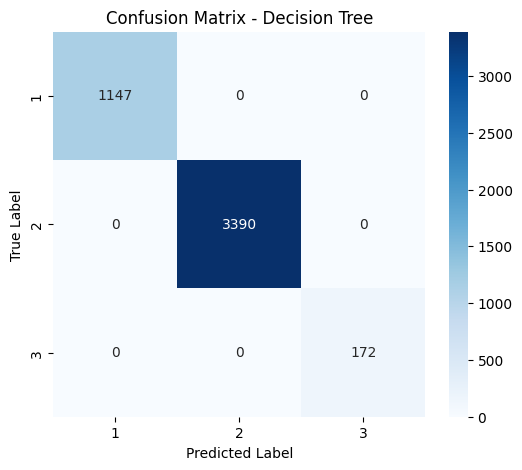

In [15]:
# 🔹 Decision Tree Evaluation
y_pred_dt = dt.predict(X_test)  # Predict using Decision Tree

# Print the accuracy and classification report for Decision Tree
print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("🔹 Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

🔹 Random Forest Accuracy:

 1.0
🔹 Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1147
           2       1.00      1.00      1.00      3390
           3       1.00      1.00      1.00       172

    accuracy                           1.00      4709
   macro avg       1.00      1.00      1.00      4709
weighted avg       1.00      1.00      1.00      4709



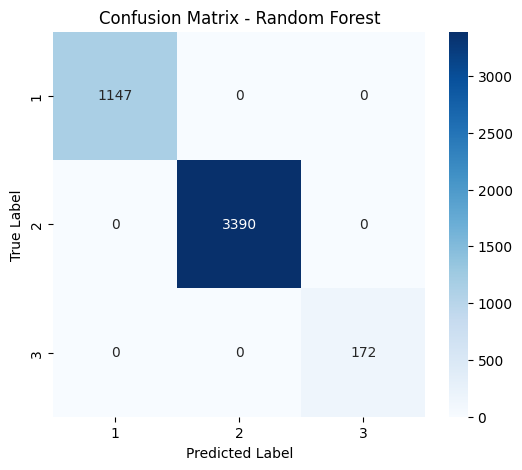

In [16]:
# 🔹 Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("🔹 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

#Klasifikasi dengan Random Forrest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

**Karena sudah 100% benar jadi tidak perlu**

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

**Karena sudah 100% benar jadi tidak perlu**

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Tidak ada rekomendasi dan tidak bisa di bandingkan karena hasil klasifikasi sama sama memberikan nilai sempurna yaitu 100% baik di akurasi, presisi, recall, dan f1 Score. Evaluation Matrix juga memberikan hasil sempurna sesuai dengan cluster yang sudah dibuat sebelumnya**